In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')
df.head()

C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\2927276076.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data for Cleaning & Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [3]:
df.shape

(400000, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [5]:
df1 = pd.read_csv("Holdout for Testing.csv")
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [6]:
df1.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
79995,NaN,38272852,41056632,"$6,400","$6,400","$6,400",36 months,A,A2,Supervisor,...,6-Apr,0,NaN,NaN,13,0,7185,47.90%,15,f
79996,NaN,38232598,41016384,"$30,000","$30,000","$30,000",60 months,E,E2,Manager,...,Aug-96,0,NaN,NaN,19,0,25151,51.30%,38,f
79997,NaN,38282597,41066378,"$17,600","$17,600","$17,600",36 months,D,D4,Field Unit Supervisor,...,4-Dec,0,32.0,NaN,18,0,12161,37.10%,36,f
79998,NaN,38232613,41016400,"$2,500","$2,500","$2,500",36 months,C,C2,Senior Project Manager,...,Jun-99,0,NaN,NaN,13,0,13031,76.70%,23,f
79999,NaN,38262186,41045946,"$11,800","$11,800","$11,800",36 months,B,B5,Accountant,...,5-Dec,0,NaN,NaN,8,0,13773,93.70%,26,f


In [7]:
df1.shape

(80000, 32)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

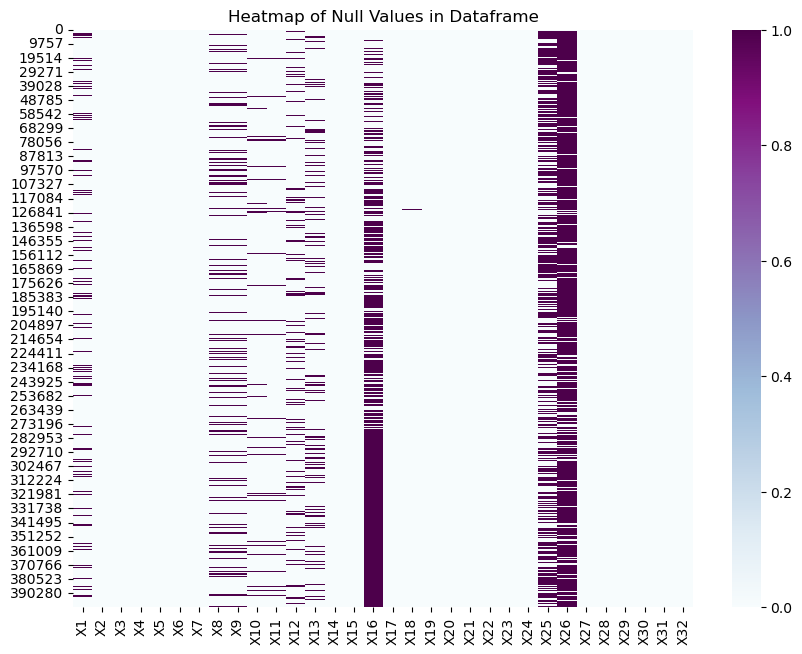

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

null_mask = df.isnull()

plt.figure(figsize=(10, 7.5))
sns.heatmap(null_mask, cmap='BuPu')
plt.title('Heatmap of Null Values in Dataframe')
plt.show()

In [10]:
df['X1'].value_counts()

10.99%    11082
12.99%     9951
15.61%     9869
8.90%      9656
7.90%      8569
          ...  
16.96%        1
16.01%        1
24.40%        1
16.71%        1
18.72%        1
Name: X1, Length: 482, dtype: int64

In [11]:
# We need to remove the % symbol in order to continue and change the data type
df['X1'] = df["X1"].str.replace("%","")

In [12]:
df['X1'] = df['X1'].astype(float)

In [13]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [14]:
# Remove the null's in X1 since it is the predicted outcome. All the columns here are also removed where X1 has nulls.
# We can't predict the train data which is our Y.
df = df.dropna(subset=['X1'])

In [15]:
# For the prediction we don't need unique ID for the loan and unique ID assigned for the borrower. So dropping X2 And X3
df = df.drop('X2', axis = 1)
df = df.drop('X3', axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X4      338989 non-null  object 
 2   X5      338989 non-null  object 
 3   X6      338989 non-null  object 
 4   X7      338989 non-null  object 
 5   X8      287123 non-null  object 
 6   X9      287123 non-null  object 
 7   X10     318733 non-null  object 
 8   X11     324195 non-null  object 
 9   X12     287030 non-null  object 
 10  X13     287238 non-null  float64
 11  X14     338989 non-null  object 
 12  X15     338989 non-null  object 
 13  X16     105056 non-null  object 
 14  X17     338989 non-null  object 
 15  X18     338973 non-null  object 
 16  X19     338989 non-null  object 
 17  X20     338989 non-null  object 
 18  X21     338989 non-null  float64
 19  X22     338989 non-null  float64
 20  X23     338989 non-null  object 
 21  X24     33

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1'>

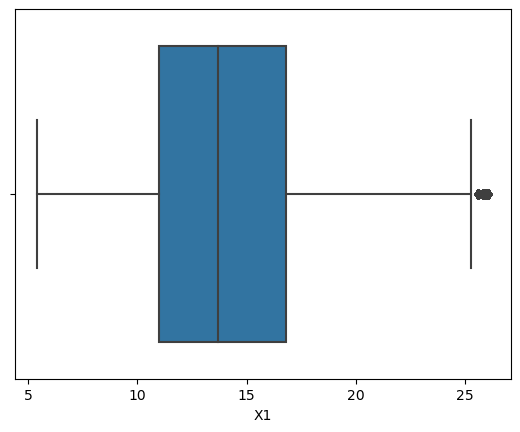

In [17]:
sns.boxplot(df['X1'])
#This plot is drawn to see the range of X1 i.e the predicted values.

In [18]:
# We also can drop X25 and X26 since more than 60% of the values are missing there.
df = df.drop('X25', axis = 1)
df = df.drop('X26', axis = 1)

           X1       X13       X21       X22       X24       X27       X28  \
X1   1.000000 -0.032207  0.158111  0.091661  0.210398  0.020455  0.073577   
X13 -0.032207  1.000000 -0.182043  0.060732  0.064507  0.155162 -0.014904   
X21  0.158111 -0.182043  1.000000 -0.002780  0.000108  0.304079 -0.045657   
X22  0.091661  0.060732 -0.002780  1.000000  0.024449  0.062197 -0.008412   
X24  0.210398  0.064507  0.000108  0.024449  1.000000  0.099971  0.038387   
X27  0.020455  0.155162  0.304079  0.062197  0.099971  1.000000 -0.029546   
X28  0.073577 -0.014904 -0.045657 -0.008412  0.038387 -0.029546  1.000000   
X29  0.008171  0.323168  0.146286 -0.030157 -0.015416  0.221781 -0.096094   
X31 -0.027147  0.222399  0.228753  0.133373  0.134044  0.677866  0.004992   

          X29       X31  
X1   0.008171 -0.027147  
X13  0.323168  0.222399  
X21  0.146286  0.228753  
X22 -0.030157  0.133373  
X24 -0.015416  0.134044  
X27  0.221781  0.677866  
X28 -0.096094  0.004992  
X29  1.000000  0.2003

<AxesSubplot:>

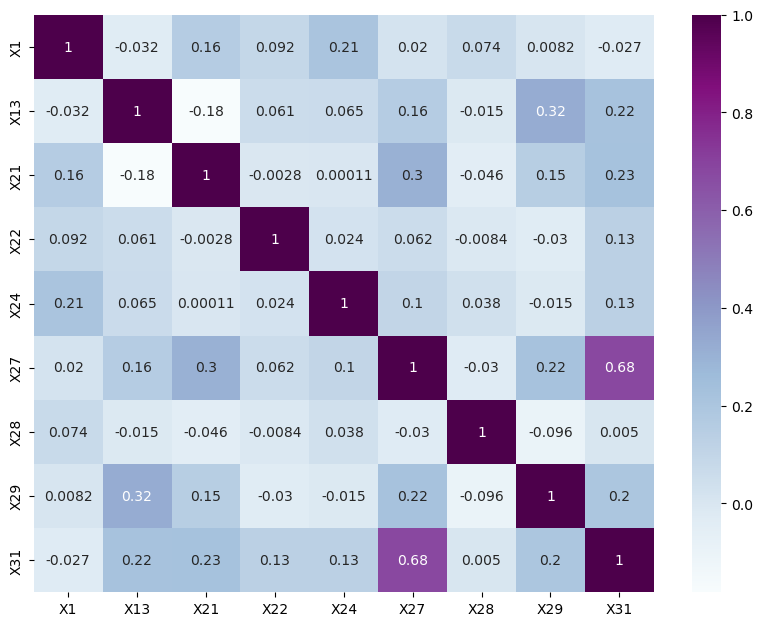

In [19]:
corr_var=df.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [20]:
# X16 have more than 65% missing values and also the reason is not necessary.
df = df.drop('X16', axis = 1)

In [21]:
# Removing X10 and X18 because people come from different background. Loan title is also given by the borrower.
df = df.drop('X10', axis = 1)
df = df.drop('X18', axis = 1)

In [22]:
df.head(10)

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f
5,19.05,"$7,200","$7,200","$7,200",36 months,D,D4,9 years,RENT,58000.0,...,2.05,0.0,Apr-94,0.0,6.0,0.0,3874.0,90.10%,25.0,f
6,10.08,"$7,500","$5,025",$557,36 months,B,B3,3 years,RENT,85000.0,...,8.10,0.0,Nov-00,1.0,3.0,0.0,33667.0,73.20%,11.0,f
7,14.26,"$3,000","$3,000","$2,988",36 months,C,C5,3 years,MORTGAGE,80800.0,...,14.97,1.0,Jul-98,0.0,13.0,0.0,4740.0,39.50%,23.0,f
8,7.88,"$4,000","$4,000","$3,900",36 months,A,A5,< 1 year,MORTGAGE,148000.0,...,16.98,0.0,May-93,0.0,11.0,0.0,50807.0,51%,19.0,f
9,14.96,"$5,600","$5,600","$5,525",36 months,D,D2,1 year,RENT,45000.0,...,4.00,0.0,Jun-01,0.0,5.0,1.0,3839.0,76.80%,9.0,f


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X4      338989 non-null  object 
 2   X5      338989 non-null  object 
 3   X6      338989 non-null  object 
 4   X7      338989 non-null  object 
 5   X8      287123 non-null  object 
 6   X9      287123 non-null  object 
 7   X11     324195 non-null  object 
 8   X12     287030 non-null  object 
 9   X13     287238 non-null  float64
 10  X14     338989 non-null  object 
 11  X15     338989 non-null  object 
 12  X17     338989 non-null  object 
 13  X19     338989 non-null  object 
 14  X20     338989 non-null  object 
 15  X21     338989 non-null  float64
 16  X22     338989 non-null  float64
 17  X23     338989 non-null  object 
 18  X24     338989 non-null  float64
 19  X27     338989 non-null  float64
 20  X28     338989 non-null  float64
 21  X29     33

In [24]:
# Since we cannot predict X30 and also there is a very limited value loss we can remove those columns whith null
df = df.dropna(subset=['X30'])

In [25]:
df['X12'].value_counts()

MORTGAGE    145864
RENT        115882
OWN          24951
OTHER          105
NONE            30
ANY              1
Name: X12, dtype: int64

In [26]:
# normalized the values into percentages to plot a graph
df['X12'].value_counts(normalize=True)

MORTGAGE    0.508533
RENT        0.404005
OWN         0.086988
OTHER       0.000366
NONE        0.000105
ANY         0.000003
Name: X12, dtype: float64

<AxesSubplot:>

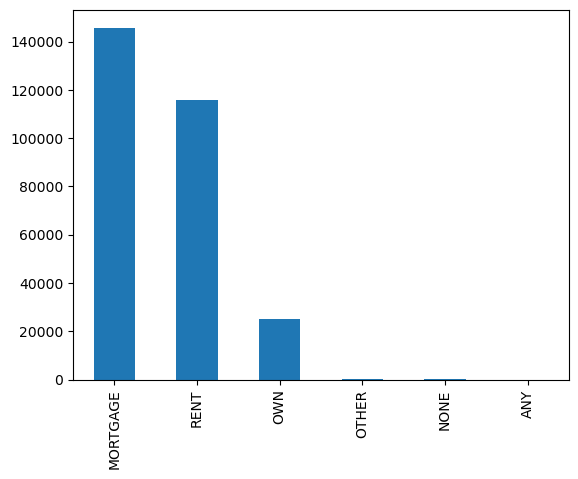

In [27]:
df['X12'].value_counts().plot.bar()

In [28]:
df['X8'].describe()
df['X9'].describe()

count     286945
unique        35
top           B3
freq       20343
Name: X9, dtype: object

<AxesSubplot:xlabel='X8', ylabel='count'>

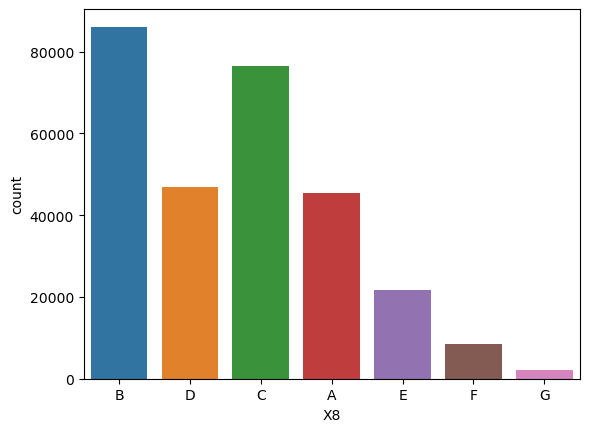

In [29]:
sns.countplot(x='X8', data=df)

<AxesSubplot:xlabel='X9', ylabel='count'>

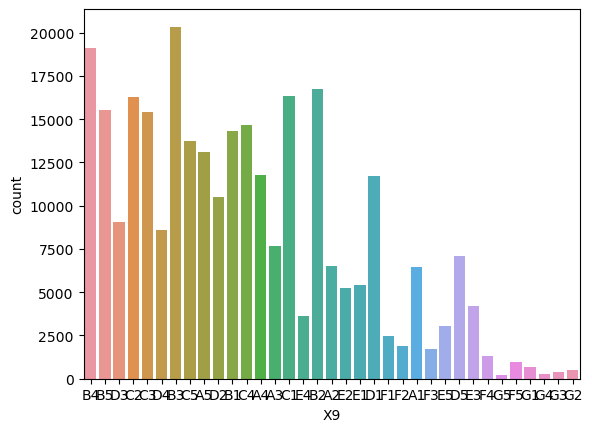

In [30]:
sns.countplot(x='X9', data=df)

In [31]:
#from above both plots we observe that there is huge number count for grade B in X8 and sub-grade B3 have more in X9.
#filling with mode would be better here.
#imputed all X8 null values with class B using mode 
df['X8'].fillna(df['X8'].mode()[0], inplace=True)

In [32]:
df['X9'].fillna(df['X9'].mode()[0], inplace=True)

In [33]:
df['X8'].describe()

count     338765
unique         7
top            B
freq      137909
Name: X8, dtype: object

In [34]:
df['X9'].describe()

count     338765
unique        35
top           B3
freq       72163
Name: X9, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338765 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338765 non-null  float64
 1   X4      338765 non-null  object 
 2   X5      338765 non-null  object 
 3   X6      338765 non-null  object 
 4   X7      338765 non-null  object 
 5   X8      338765 non-null  object 
 6   X9      338765 non-null  object 
 7   X11     323979 non-null  object 
 8   X12     286833 non-null  object 
 9   X13     287050 non-null  float64
 10  X14     338765 non-null  object 
 11  X15     338765 non-null  object 
 12  X17     338765 non-null  object 
 13  X19     338765 non-null  object 
 14  X20     338765 non-null  object 
 15  X21     338765 non-null  float64
 16  X22     338765 non-null  float64
 17  X23     338765 non-null  object 
 18  X24     338765 non-null  float64
 19  X27     338765 non-null  float64
 20  X28     338765 non-null  float64
 21  X29     33

In [36]:
df['X13'].describe()

count    2.870500e+05
mean     7.313717e+04
std      5.615482e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.800000e+04
max      7.500000e+06
Name: X13, dtype: float64

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X1', ylabel='Density'>

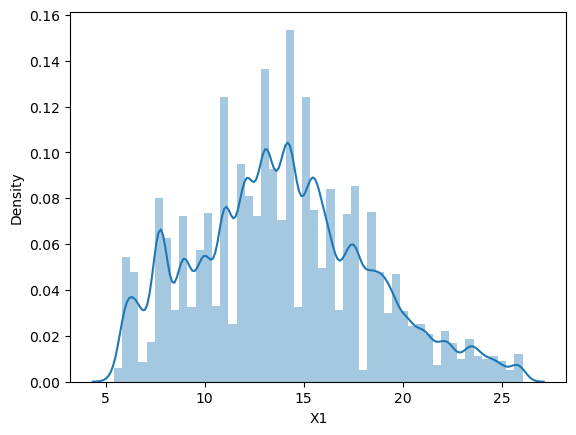

In [37]:
sns.distplot(df[df['X13'].notnull()]['X1'])

In [38]:
# filling the nulls with mean
df['X13'] = df['X13'].fillna(df['X13'].mean())

In [39]:
# By imputing with the mean, we observe that there is no much difference in the values and also the count is satisfied.
df['X13'].describe()

count    3.387650e+05
mean     7.313717e+04
std      5.169118e+04
min      3.000000e+03
25%      4.858100e+04
50%      7.000000e+04
75%      8.200000e+04
max      7.500000e+06
Name: X13, dtype: float64

In [40]:
df['X11'].value_counts()

10+ years    108420
2 years       30102
3 years       26655
< 1 year      25980
5 years       23062
1 year        21411
4 years       20241
6 years       19589
7 years       19430
8 years       16204
9 years       12885
Name: X11, dtype: int64

In [41]:
#Since X11 and X12 both are catogorical we can impute mode to them.
df['X11'].fillna(df['X11'].mode()[0], inplace=True)
df['X12'].fillna(df['X12'].mode()[0], inplace=True)

In [42]:
df['is_36 months'] = df['X7'].apply(lambda x: 1 if x == '36 months' else 0)
df = df.drop('X7', axis = 1)

In [43]:
df['is_w'] = df['X32'].apply(lambda x: 1 if x == 'w' else 0)
df = df.drop('X32', axis = 1)

In [44]:
df.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X22,X23,X24,X27,X28,X29,X30,X31,is_36 months,is_w
0,11.89,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,0,0
1,10.71,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,0,0
2,16.99,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,0,0
3,13.11,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,0,0
4,13.57,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,0,0


In [45]:
df['X17'].value_counts()

debt_consolidation    198139
credit_card            75657
home_improvement       19592
other                  17119
major_purchase          7297
small_business          5354
car                     4109
medical                 3320
moving                  2136
wedding                 1932
vacation                1843
house                   1723
educational              277
renewable_energy         267
Name: X17, dtype: int64

In [46]:
# Reason, date issued and loan category are not required for our analysis, so removing them.
df = df.drop('X15', axis = 1)
df = df.drop('X17', axis = 1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338765 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X1            338765 non-null  float64
 1   X4            338765 non-null  object 
 2   X5            338765 non-null  object 
 3   X6            338765 non-null  object 
 4   X8            338765 non-null  object 
 5   X9            338765 non-null  object 
 6   X11           338765 non-null  object 
 7   X12           338765 non-null  object 
 8   X13           338765 non-null  float64
 9   X14           338765 non-null  object 
 10  X19           338765 non-null  object 
 11  X20           338765 non-null  object 
 12  X21           338765 non-null  float64
 13  X22           338765 non-null  float64
 14  X23           338765 non-null  object 
 15  X24           338765 non-null  float64
 16  X27           338765 non-null  float64
 17  X28           338765 non-null  float64
 18  X29 

<AxesSubplot:xlabel='X20', ylabel='count'>

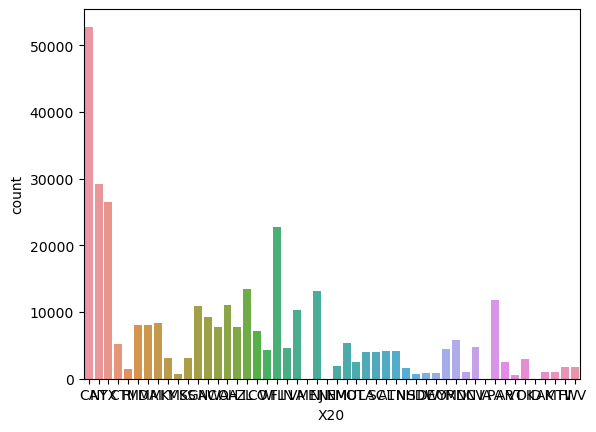

In [48]:
df['X20'].value_counts()
sns.countplot(x='X20', data=df)

In [49]:
#State does not play major role here, so we can remove

In [50]:
df = df.drop('X20', axis = 1)

In [51]:
df = df.drop('X23', axis = 1)

In [52]:
df['X19'].value_counts()

945xx    3922
750xx    3701
112xx    3687
606xx    3419
100xx    3211
         ... 
522xx       1
643xx       1
375xx       1
203xx       1
938xx       1
Name: X19, Length: 874, dtype: int64

In [53]:
df['X19'] = pd.to_numeric(df['X19'].str.replace('x', ''))

In [54]:
df['X4'] = df['X4'].str.replace('$', '')
df['X4'] = pd.to_numeric(df['X4'].str.replace(',', ''))
df['X5'] = df['X5'].str.replace('$', '')
df['X5'] = pd.to_numeric(df['X5'].str.replace(',', ''))
df['X6'] = df['X6'].str.replace('$', '')
df['X6'] = pd.to_numeric(df['X6'].str.replace(',', ''))

C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\1405483090.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X4'] = df['X4'].str.replace('$', '')
C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\1405483090.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X5'] = df['X5'].str.replace('$', '')
C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\1405483090.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X6'] = df['X6'].str.replace('$', '')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338765 entries, 0 to 399999
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X1            338765 non-null  float64
 1   X4            338765 non-null  int64  
 2   X5            338765 non-null  int64  
 3   X6            338765 non-null  int64  
 4   X8            338765 non-null  object 
 5   X9            338765 non-null  object 
 6   X11           338765 non-null  object 
 7   X12           338765 non-null  object 
 8   X13           338765 non-null  float64
 9   X14           338765 non-null  object 
 10  X19           338765 non-null  int64  
 11  X21           338765 non-null  float64
 12  X22           338765 non-null  float64
 13  X24           338765 non-null  float64
 14  X27           338765 non-null  float64
 15  X28           338765 non-null  float64
 16  X29           338765 non-null  float64
 17  X30           338765 non-null  object 
 18  X31 

In [56]:
df['X30'] = df["X30"].str.replace("%","")
df['X30'] = df["X30"].astype(float)

In [57]:
df['X14'].value_counts()

VERIFIED - income           126955
not verified                107809
VERIFIED - income source    104001
Name: X14, dtype: int64

In [58]:
df['income source'] = df['X14'].apply(lambda x: 1 if x == 'VERIFIED - income' else (2 if x == 'not verified' else 0))

In [59]:
df = df.drop('X14', axis = 1)

In [60]:
le = preprocessing.LabelEncoder()
df['X8'] = le.fit_transform(df['X8'].values)
df['X9'] = le.fit_transform(df['X9'].values)
df['X11'] = le.fit_transform(df['X11'].values)
df['X12'] = le.fit_transform(df['X12'].values)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338765 entries, 0 to 399999
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X1             338765 non-null  float64
 1   X4             338765 non-null  int64  
 2   X5             338765 non-null  int64  
 3   X6             338765 non-null  int64  
 4   X8             338765 non-null  int32  
 5   X9             338765 non-null  int32  
 6   X11            338765 non-null  int32  
 7   X12            338765 non-null  int32  
 8   X13            338765 non-null  float64
 9   X19            338765 non-null  int64  
 10  X21            338765 non-null  float64
 11  X22            338765 non-null  float64
 12  X24            338765 non-null  float64
 13  X27            338765 non-null  float64
 14  X28            338765 non-null  float64
 15  X29            338765 non-null  float64
 16  X30            338765 non-null  float64
 17  X31            338765 non-nul

                     X1        X4        X5        X6        X8        X9  \
X1             1.000000  0.177900  0.178894  0.181208  0.853759  0.873061   
X4             0.177900  1.000000  0.998329  0.994397  0.158594  0.166011   
X5             0.178894  0.998329  1.000000  0.996404  0.158270  0.165530   
X6             0.181208  0.994397  0.996404  1.000000  0.156982  0.164182   
X8             0.853759  0.158594  0.158270  0.156982  1.000000  0.978571   
X9             0.873061  0.166011  0.165530  0.164182  0.978571  1.000000   
X11           -0.013366 -0.039695 -0.039904 -0.040631 -0.009113 -0.009399   
X12            0.054367 -0.177992 -0.177744 -0.178008  0.046102  0.047796   
X13           -0.029750  0.329418  0.328819  0.327206 -0.019387 -0.019191   
X19           -0.005667 -0.008383 -0.008292 -0.007965 -0.008518 -0.008220   
X21            0.158445  0.060967  0.062494  0.066391  0.124964  0.128931   
X22            0.091591  0.008829  0.009432  0.010287  0.081516  0.083353   

<AxesSubplot:>

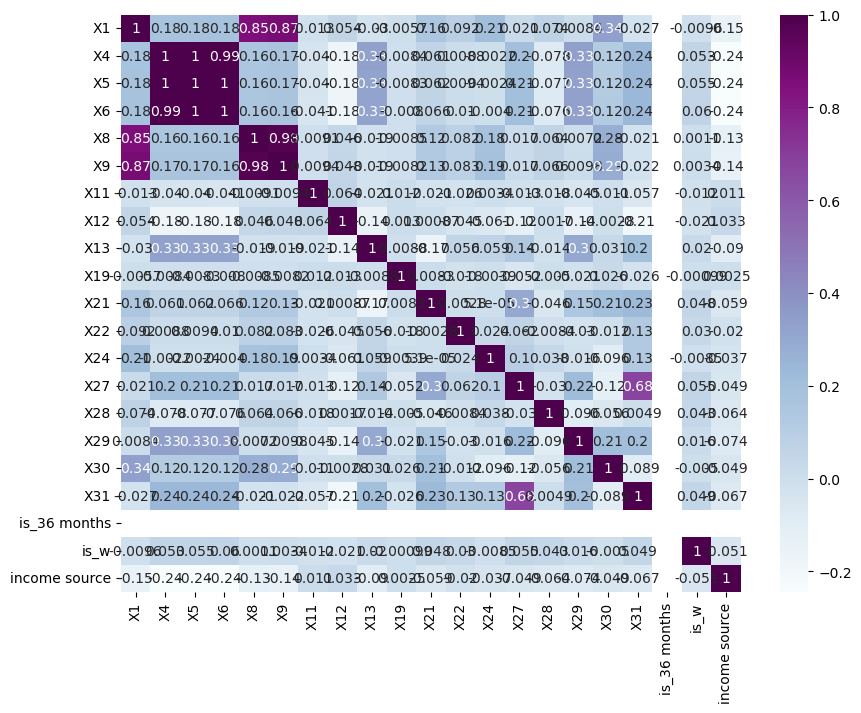

In [62]:
# plotting the corelation plot
corr_var=df.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

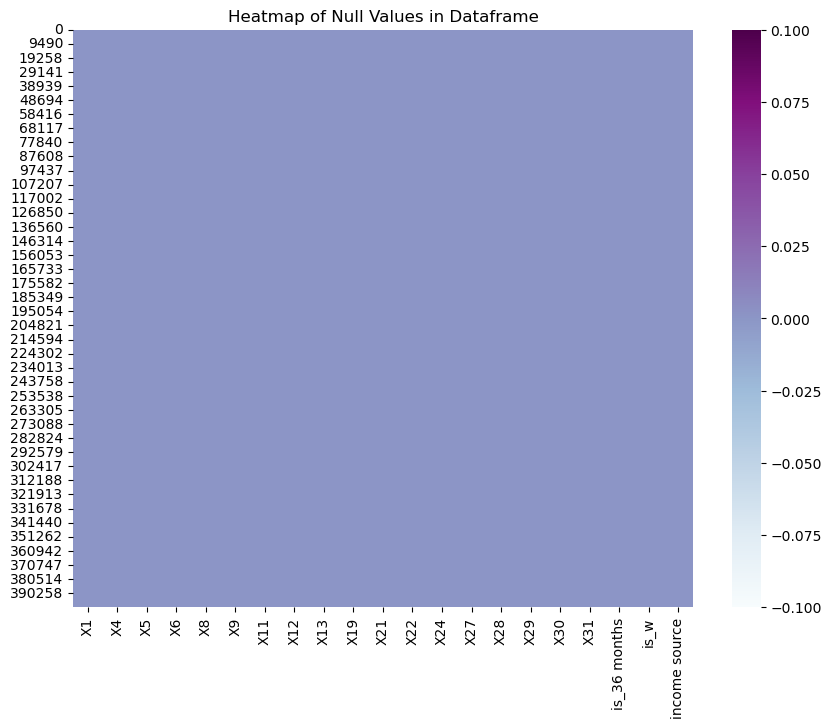

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

null_mask = df.isnull()

plt.figure(figsize=(10, 7.5))
sns.heatmap(null_mask, cmap='BuPu')
plt.title('Heatmap of Null Values in Dataframe')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
y = df['X1']

X = df.drop(['X1'], axis=1)

In [66]:
x,y = df.drop(['X1'], axis=1), df['X1']
y

0         11.89
1         10.71
2         16.99
3         13.11
4         13.57
          ...  
399995    12.99
399996    16.29
399997    10.99
399998    17.57
399999    13.35
Name: X1, Length: 338765, dtype: float64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 99)
X_train.head()

,X4,X5,X6,X8,X9,X11,X12,X13,X19,X21,X22,X24,X27,X28,X29,X30,X31,is_36 months,is_w,income source
346643,30000,30000,30000,3,16,1,1,110000.0,752,29.23,0.0,0.0,16.0,1.0,18000.0,36.4,43.0,0,1,1
165357,6500,6500,6500,3,16,1,5,43500.0,924,25.46,0.0,2.0,13.0,0.0,10388.0,67.9,20.0,0,0,0
277986,13400,13400,13400,1,7,3,5,65000.0,920,32.35,0.0,0.0,17.0,0.0,17559.0,43.9,26.0,0,1,1
163489,15500,15500,15500,1,7,1,4,80000.0,452,21.42,0.0,1.0,8.0,0.0,13971.0,65.3,17.0,0,1,1
38944,18000,11000,11000,3,16,1,1,59000.0,557,4.62,0.0,3.0,7.0,0.0,11243.0,83.9,14.0,0,0,0


In [68]:
from sklearn.linear_model import LinearRegression, RidgeCV

In [69]:
clf = RidgeCV()
clf.fit(X_train, y_train)
y_pred_ridge = clf.predict(X_test)
acc_ridge = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_ridge) + ' percent')

77.89 percent


In [70]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)
acc_lr = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_lr) + ' percent')

77.9 percent


In [71]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred_ridge = clf.predict(X_test)
acc_ridge = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_ridge) + ' percent')

70.58 percent


In [72]:
from sklearn.svm import LinearSVR
clf = LinearSVR()
clf.fit(X_train, y_train)
y_pred_ridge = clf.predict(X_test)
acc_ridge = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_ridge) + ' percent')

65.43 percent


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [73]:
# Reading the test data and then applying the same steps which is done to our train data.

In [74]:
df1 = pd.read_csv('Holdout for Testing.csv')
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [75]:
df1 = df1.drop('X2', axis = 1)
df1 = df1.drop('X3', axis = 1)
df1 = df1.drop('X25', axis = 1)
df1 = df1.drop('X26', axis = 1)
df1 = df1.drop('X16', axis = 1)
df1 = df1.drop('X10', axis = 1)
df1 = df1.drop('X18', axis = 1)
df1 = df1.dropna(subset=['X30'])
df1['X8'].fillna(df1['X8'].mode()[0], inplace=True)
df1['X9'].fillna(df1['X9'].mode()[0], inplace=True)
df1['X13'] = df1['X13'].fillna(df['X13'].mean())
df1['X11'].fillna(df1['X11'].mode()[0], inplace=True)
df1['X12'].fillna(df1['X12'].mode()[0], inplace=True)
df1['is_36 months'] = df1['X7'].apply(lambda x: 1 if x == '36 months' else 0)
df1 = df1.drop('X7', axis = 1)
df1['is_w'] = df1['X32'].apply(lambda x: 1 if x == 'w' else 0)
df1 = df1.drop('X32', axis = 1)
df1 = df1.drop('X15', axis = 1)
df1 = df1.drop('X17', axis = 1)
df1 = df1.drop('X20', axis = 1)
df1 = df1.drop('X23', axis = 1)
df1['X19'] = pd.to_numeric(df1['X19'].str.replace('x', ''))
df1['X4'] = df1['X4'].str.replace('$', '')
df1['X4'] = pd.to_numeric(df1['X4'].str.replace(',', ''))
df1['X5'] = df1['X5'].str.replace('$', '')
df1['X5'] = pd.to_numeric(df1['X5'].str.replace(',', ''))
df1['X6'] = df1['X6'].str.replace('$', '')
df1['X6'] = pd.to_numeric(df1['X6'].str.replace(',', ''))
df1['X30'] = df1["X30"].str.replace("%","")
df1['X30'] = df1["X30"].astype(float)
df1['income source'] = df1['X14'].apply(lambda x: 1 if x == 'VERIFIED - income' else (2 if x == 'not verified' else 0))
df1 = df1.drop('X14', axis = 1)


C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\3899328905.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['X4'] = df1['X4'].str.replace('$', '')
C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\3899328905.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['X5'] = df1['X5'].str.replace('$', '')
C:\Users\tarun\AppData\Local\Temp\ipykernel_7984\3899328905.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['X6'] = df1['X6'].str.replace('$', '')


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79970 entries, 0 to 79999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X1             0 non-null      float64
 1   X4             79970 non-null  int64  
 2   X5             79970 non-null  int64  
 3   X6             79970 non-null  int64  
 4   X8             79970 non-null  object 
 5   X9             79970 non-null  object 
 6   X11            79970 non-null  object 
 7   X12            79970 non-null  object 
 8   X13            79970 non-null  float64
 9   X19            79970 non-null  int64  
 10  X21            79970 non-null  float64
 11  X22            79970 non-null  int64  
 12  X24            79970 non-null  int64  
 13  X27            79970 non-null  int64  
 14  X28            79970 non-null  int64  
 15  X29            79970 non-null  int64  
 16  X30            79970 non-null  float64
 17  X31            79970 non-null  int64  
 18  is_36 

In [77]:
le = preprocessing.LabelEncoder()
df1['X8'] = le.fit_transform(df1['X8'].values)
df1['X9'] = le.fit_transform(df1['X9'].values)
df1['X11'] = le.fit_transform(df1['X11'].values)
df1['X12'] = le.fit_transform(df1['X12'].values)

In [78]:
X_test = df1.drop(['X1'],axis=1)
X_test.head()

,X4,X5,X6,X8,X9,X11,X12,X13,X19,X21,X22,X24,X27,X28,X29,X30,X31,is_36 months,is_w,income source
0,6000,6000,6000,2,14,1,0,68000.0,430,28.31,0,1,18,0,19861,64.5,33,0,0,1
1,24000,24000,24000,0,0,8,2,110480.0,945,16.03,0,1,12,0,17001,26.2,36,0,1,1
2,35000,35000,35000,2,11,1,0,86000.0,195,32.49,0,0,16,0,25797,49.9,33,0,1,1
3,10000,10000,10000,3,15,1,2,30000.0,921,32.96,0,1,13,1,9586,43.8,21,0,1,0
4,24000,24000,24000,1,5,1,0,82500.0,196,31.03,0,0,27,0,31842,41.3,43,0,1,1


In [79]:
# Here Linear regression model is used because when we compared it with other 4 models, this gave us a high accuracy of 77.9%.

In [80]:
y_pred_lr = clf.predict(X_test)

In [81]:
y_pred_lr

array([17.2457191 ,  8.74637657, 16.87703897, ..., 19.48694013,
       13.96899468, 14.07355656])

In [82]:
len(y_pred_lr)

79970

In [83]:
dataframe = pd.DataFrame(y_pred_lr) 
dataframe.to_csv("Result.csv",index=False)

In [84]:
df_res = pd.read_csv("Result.csv")

In [85]:
df_res.head(10)

,0
0,17.245719
1,8.746377
2,16.877039
3,18.026602
4,12.951092
5,13.672844
6,13.830822
7,12.345674
8,17.281245
9,8.834120
